# Our Algorithm
Each time-step we feed the arm-choice and the resulting reward of the underlying $\epsilon$-greedy algorithm through a Gated Recurrent Unit (GRU) network. The network outputs mean and standard deviation of a normal distribution from which we sample our action. The action is fed back into the $\epsilon$-greedy algorithm and used as the value for $\epsilon$ on that time-step.


# Baselines
- Constant $\epsilon$: sets $\epsilon$ to a constant, in our case 0.1.
- Linear $\epsilon$: linearly anneals $\epsilon$ from 0.3 to 0, subtracting 3e-4 from $\epsilon$ each time-step.
- Exponential $\epsilon$: exponentially anneals $\epsilon$. The starting value of $\epsilon$ is 1 and each time-step we multiply it by 0.99 

# Datasets

## Sutton and Barto 10-armed Testbed
This bandit setting is borrowed from Sutton and Barto's _Reinforcement Learning_ textbook. For each of the ten arms, we sample $\mu$ from a standard normal distribution. We then sample the reward for each arm from a unit-variance normal distribution with mean $\mu$.

### 0/1 10-armed Testbed
This bandit setting is identical to the first except for the method of choosing $\mu$. In this setting, we set $\mu$ to 0 for all arms except one, which is chosen randomly and set to 1.

In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# import seaborn as sns; sns.set()

%matplotlib inline
ns = [15, 20, 22, 23]
def df(pattern):
    path = next(Path('/home/jovyan/').glob(pattern))
    array = np.load(str(path))
    n, d = array.shape
    indices = np.tile(np.arange(d), n)
    return pd.DataFrame(dict(y=array.flatten(), x=indices, pattern=pattern))


def _plot(*patterns, kind="line", ci="sd",**kwargs):
    data = pd.concat(df(p) for p in patterns)
    sns.relplot(x="x", y="y", hue="pattern", kind=kind, ci=ci, data=data);

    
def moving_average1(a, n=1):
    ret = np.cumsum(a, dtype=float, axis=1)
    ret[:, n:] = ret[:, n:] - ret[:, :-n]
    return ret[:, n - 1:] / n
    
def _plot(*patterns):
    for pattern in patterns:
        path = next(Path('/home/jovyan/').glob(pattern))
        array = moving_average1(np.load(str(path)))
        n, d = array.shape
        mean = array.mean(0)
        std = array.std(0)
        ste = std / np.sqrt(n)
        plt.plot(mean)
        plt.fill_between(np.arange(d), mean - ste, mean + ste, alpha=0.5)
    plt.show()
    
def plot(path, label):
    array = np.load(str(path))
    n, d = array.shape
    mean = array.mean(0)
    std = array.std(0)
    ste = std / np.sqrt(n)
    plt.plot(mean, label=label)
    plt.fill_between(np.arange(d), mean - ste, mean + ste, alpha=0.5)

datasets = ['01', 'sb']
dataset_name = {'sb':'Sutton and Barto 10-armed Testbed', '01': '0/1-mean 10-armed Testbed'}
algos = ['const', 'linear', 'exp', 'our']
labels = dict(
    our='ours',
    const='constant',
    linear='linear',
    exp='exponenial'
)

#for n in ns:
#plot(f'*/sb/Teacher*/')

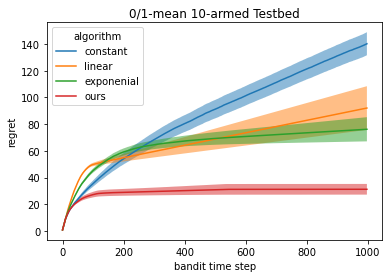

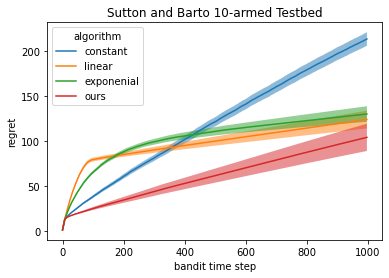

In [2]:
for dataset in datasets:
    for algo in algos:
        path = next(Path('/home/jovyan/').glob(f'*/{dataset}/Teacher*/{algo}_regret.npy'))
        array = np.load(str(path)).cumsum(1)
        n, d = array.shape
        mean = array.mean(0)
        std = array.std(0)
        ste = std / np.sqrt(n)
        plt.plot(mean, label=labels[algo])
        plt.fill_between(np.arange(d), mean - ste, mean + ste, alpha=0.5)        
        plt.title(dataset_name[dataset])
        plt.legend(title='algorithm')
        plt.ylabel('regret')
        plt.xlabel('bandit time step')
    plt.show()

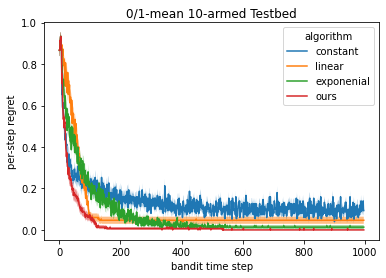

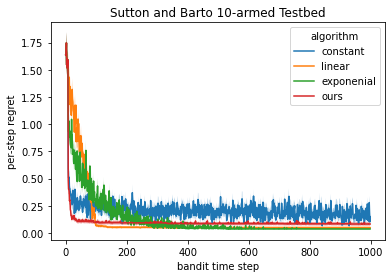

In [3]:
for dataset in datasets:
    for algo in algos:
        path = next(Path('/home/jovyan/').glob(f'*/{dataset}/Teacher*/{algo}_regret.npy'))
        plot(path, labels[algo])
        
    plt.title(dataset_name[dataset])
    plt.legend(title='algorithm')
    plt.ylabel('per-step regret')
    plt.xlabel('bandit time step')
    plt.show()

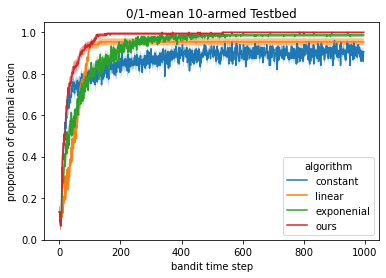

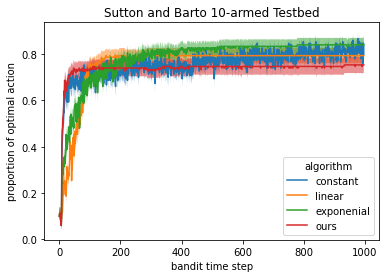

In [4]:
for dataset in datasets:
    for algo in algos:
        path = next(Path('/home/jovyan/').glob(f'*/{dataset}/Teacher*/{algo}_optimality.npy'))
        plot(path, labels[algo])
        
    plt.title(dataset_name[dataset])
    plt.legend(title='algorithm')
    plt.ylabel('proportion of optimal action')
    plt.xlabel('bandit time step')
    plt.show()

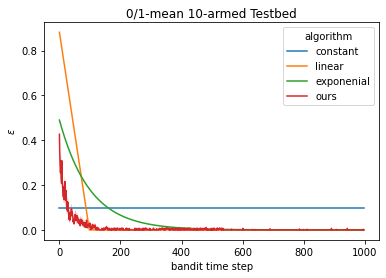

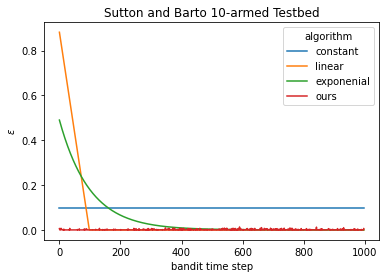

In [5]:
for dataset in datasets:
    for algo in algos:
        path = next(Path('/home/jovyan/').glob(f'*/{dataset}/Teacher*/{algo}_epsilon.npy'))
        plot(path, labels[algo])
        
    plt.title(dataset_name[dataset])
    plt.legend(title='algorithm')    
    plt.ylabel('$\epsilon$')
    plt.xlabel('bandit time step')
    plt.show()

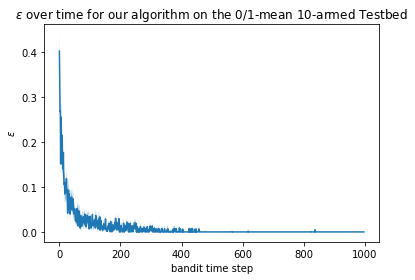

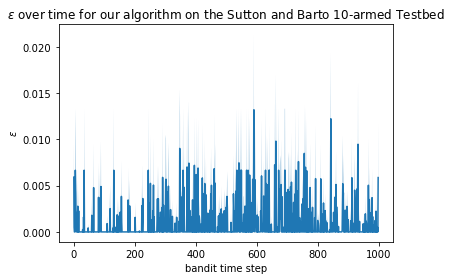

In [6]:
for dataset in datasets:
    algo = 'our'
    path = next(Path('/home/jovyan/').glob(f'*/{dataset}/Teacher*/{algo}_epsilon.npy'))
    plot(path, labels[algo])
        
    plt.title(f'$\epsilon$ over time for our algorithm on the {dataset_name[dataset]}')
    plt.ylabel('$\epsilon$')
    plt.xlabel('bandit time step')
    plt.show()